# rrBLUP results figures
* Population structure
* Cross-validation
* Performance
* Feature selection


In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

envs = ["YPACETATE", "YPD14", "YPD40", "YPD42", "YPD6AU", "YPDANISO10", 
"YPDANISO20", "YPDANISO50", "YPDBENOMYL200", "YPDBENOMYL500", "YPDCAFEIN40", 
"YPDCAFEIN50", "YPDCHX05", "YPDCHX1", "YPDCUSO410MM", "YPDDMSO", "YPDETOH", 
"YPDFLUCONAZOLE", "YPDFORMAMIDE4", "YPDFORMAMIDE5", "YPDHU", "YPDKCL2M", 
"YPDLICL250MM", "YPDMV", "YPDNACL15M", "YPDNACL1M", "YPDNYSTATIN", "YPDSDS", 
"YPDSODIUMMETAARSENITE", "YPETHANOL", "YPGALACTOSE", "YPRIBOSE", "YPGLYCEROL", 
"YPXYLOSE", "YPSORBITOL"]

# Growth Conditions and Descriptions
# growth temperature is 30C if not specified
cond = {"YPDKCL2M":"YPD KCL 2M", "YPGALACTOSE":"YP Galactose 2%", "YPD40":"YPD 40C", 
"YPDCHX05":"YPD Cycloheximide 0.5µg/ml", "YPDLICL250MM":"YPD LiCl 250mM", 
"YPGLYCEROL":"YP Glycerol 2%", "YPD42":"YPD 42C", "YPDCHX1":"YPD Cycloheximide 1µg/ml", 
"YPDMV":"YPD Methylviologen 20mM", "YPRIBOSE":"YP Ribose 2%", "YPD6AU":"YPD 6-Azauracile 600µg/ml", 
"YPDCUSO410MM":"YPD CuSO4 10mM", "YPDNACL15M":"YPD NaCl 1.5M", "YPSORBITOL":"YP Sorbitol 2%", 
"YPDANISO10":"YPD Anisomycin 10µg/ml", "YPDNACL1M":"YPD NaCl 1M", "YPXYLOSE":"YP Xylose 2%", 
"YPDANISO20":"YPD Anisomycin 20µg/ml", "YPDETOH":"YPD Ethanol 15%", "YPDSDS":"YPD SDS 0.2%", 
"YPDSODIUMMETAARSENITE":"YPD Sodium metaarsenite 2.5mM", "YPDNYSTATIN":"YPD Nystatin 10µg/ml", 
"YPDFLUCONAZOLE":"YPD Fluconazole 20µg/ml", "YPACETATE":"YP Acetate 2%", "YPDCAFEIN40":"YPD Caffeine 40mM", 
"YPDHU":"YPD Hydroxyurea 30mg/ml", "YPETHANOL":"YP Ethanol 2%", "YPD14":"YPD 14C", 
"YPDCAFEIN50":"YPD Caffeine 50mM", "YPDDMSO":"YPD DMSO 6%", "YPDANISO50":"YPD Anisomycin 50µg/ml", 
"YPDBENOMYL200":"YPD Benomyl 200µg/ml", "YPDFORMAMIDE4":"YPD Formamide 4%", 
"YPDBENOMYL500":"YPD Benomyl 500µg/ml", "YPDFORMAMIDE5":"YPD Formamide 5%"}

# Directory containing SNP PC-based rrBLUP results data (population structure)
os.chdir("/mnt/gs18/scratch/users/seguraab/yeast_project/yeast_rrBLUP_results/PCs")

# Directory containing SNP-based rrBLUP results data
#os.chdir("/mnt/home/seguraab/Shiu_Lab/Project/yeast_rrBLUP_results/SNPs_as_Features")

# Directory to save figures
dir = "/mnt/home/seguraab/Shiu_Lab/Project/Scripts/Genomic_Prediction_rrBLUP/Figures"
os.getcwd()

'/mnt/gs18/scratch/users/seguraab/yeast_project/yeast_rrBLUP_results/PCs'

## Context-specific model performance during training of validation set and test set

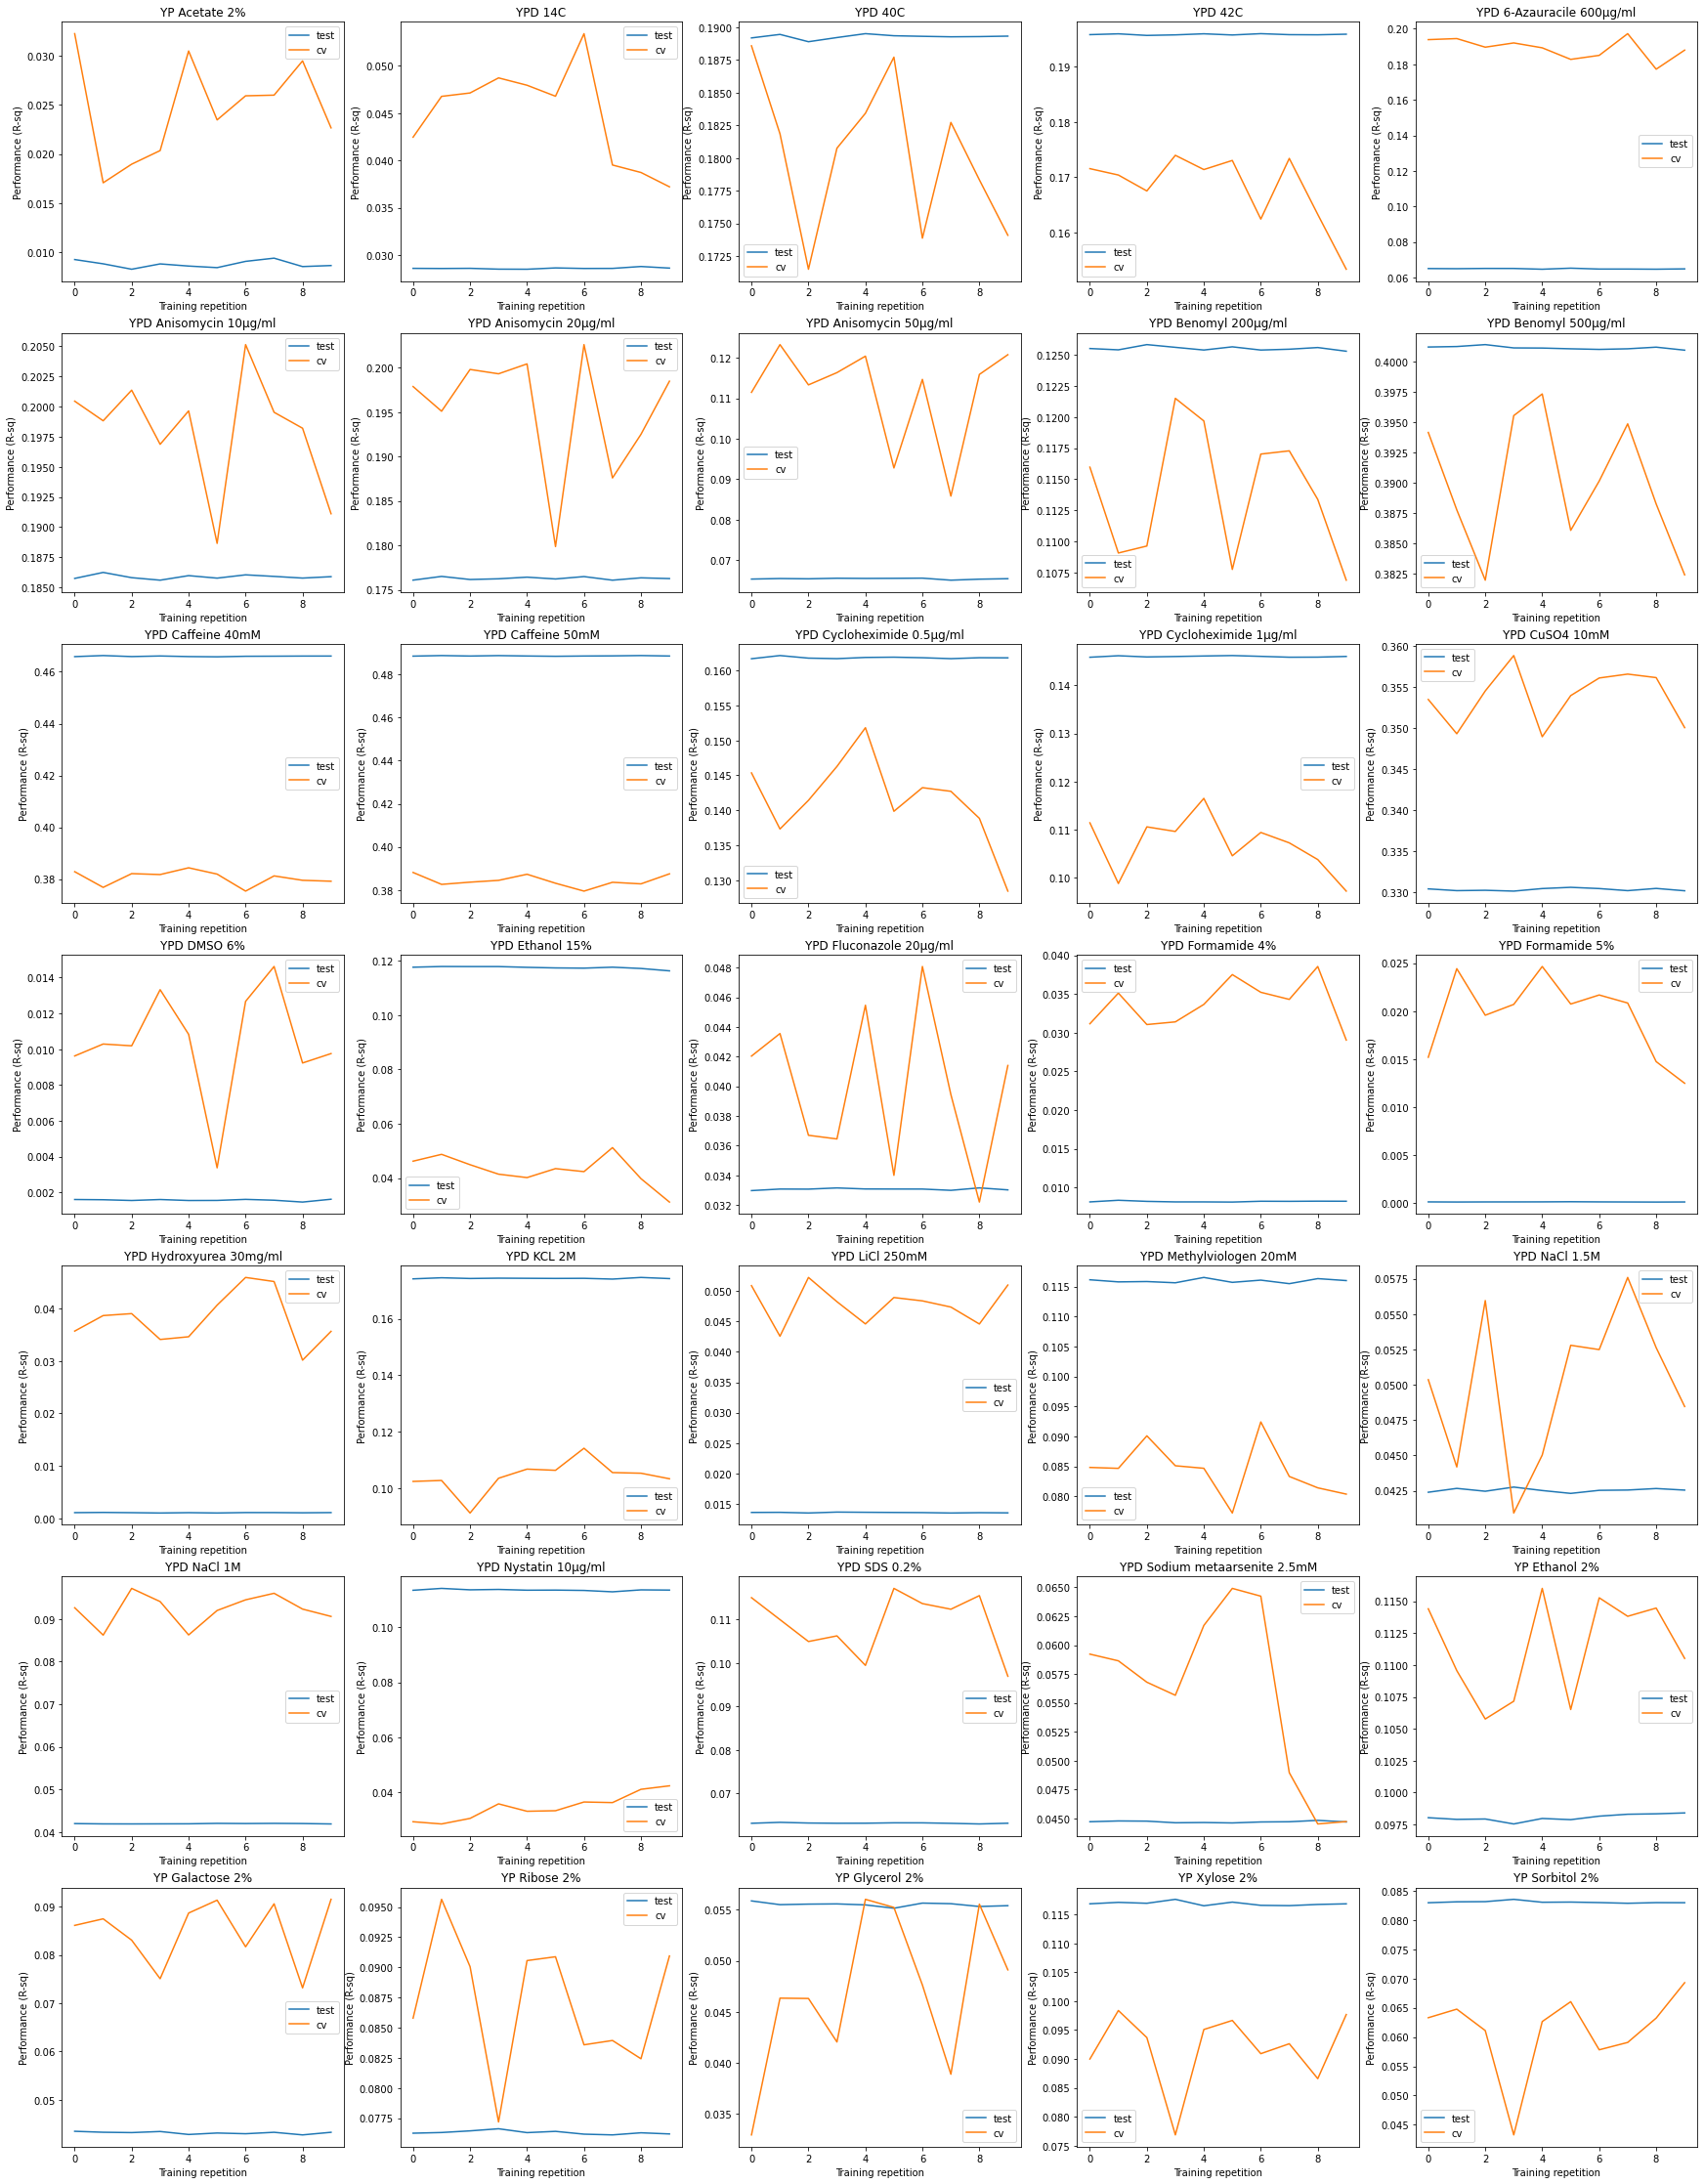

In [14]:
# Population structure: SNP PC-based
results_test = {}
results_cv = {}
fig, axs = plt.subplots(7, 5, figsize=(30, 40))
for env, ax in zip(envs, axs.ravel()):
#for env in envs:
    test = pd.read_csv("R2_test_results_%s_PCs_rrblup_%s.csv"%(env,env))
    cv = pd.read_csv("R2_cv_results_%s_PCs_rrblup_%s.csv"%(env,env))
    # average results for all envs
    results_test[cond[env]] = test.mean()[0]
    results_cv[cond[env]] = cv.mean()[0]
    # plot performance on test set and validation set
    test.plot(xlabel="Training repetition", ylabel="Performance (R-sq)", ax=ax)#, title=cond[env].values)
    #ax = test.plot(xlabel="Training repetition", ylabel="Performance (R-sq)")#, title=cond[env].values) # individual plots
    cv.plot(ax=ax)
    ax.legend(["test", "cv"])  #plt.legend(["test", "cv"])
    ax.set_title(cond[env]) # plt.title(cond[env])
plt.savefig("%s/rrBLUP_PCs_R2_cv_and_test.pdf"%dir)

# Average performance of each context-specific model
results_test = pd.Series(data = results_test)
results_cv = pd.Series(data = results_cv)

# save to file
dir2 = "/mnt/home/seguraab/Shiu_Lab/Project/Results"
results_test.to_csv("%s/rrBLUP_PCs_average_test_R2.csv"%dir2)
results_cv.to_csv("%s/rrBLUP_PCs_average_cv_R2.csv"%dir2)

In [3]:
# SNP-based
results_test = {}
results_cv = {}
for env in envs:
    test = pd.read_csv("R2_test_results_rrBLUP_geno_%s.csv"%env)
    cv = pd.read_csv("R2_cv_results_rrBLUP_geno_%s.csv"%env)
    # average results for all envs
    results_test[cond[env]] = test.mean()[0]
    results_cv[cond[env]] = cv.mean()[0]
    # plot performance on test set and validation set
    ax = test.plot(xlabel="Training repetition", ylabel="Performance (R-sq)")#, title=cond[env].values)
    cv.plot(ax=ax)
    plt.legend(["test", "cv"])
    plt.title(cond[env])
    plt.savefig("%s/rrBLUP_R2_cv_and_test_%s.pdf"%(dir,env))

# Average performance of each context-specific model
results_test = pd.Series(data = results_test)
results_cv = pd.Series(data = results_cv)

# save to file
dir2 = "/mnt/home/seguraab/Shiu_Lab/Project/Results"
results_test.to_csv("%s/rrBLUP_average_test_R2.csv"%dir2)
results_cv.to_csv("%s/rrBLUP_average_cv_R2.csv"%dir2)

FileNotFoundError: [Errno 2] No such file or directory: 'R2_test_results_rrBLUP_geno_YPACETATE.csv'

## Average performance R-sq for each context-specific model

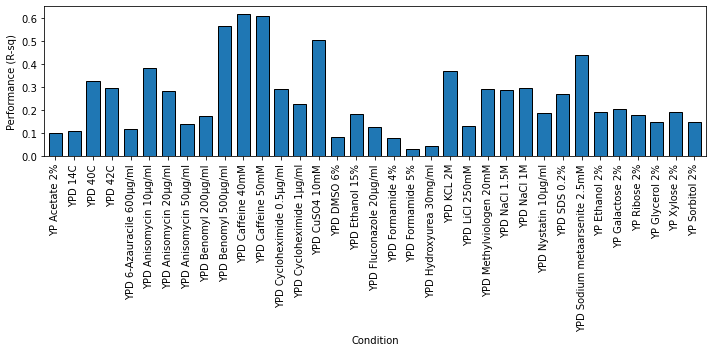

In [ ]:
results_test.plot(kind="bar", width=0.7, edgecolor="black", figsize=(10,5), ylabel="Performance (R-sq)", xlabel="Condition")
plt.tight_layout()
plt.savefig("%s/rrBLUP_average_test_R2_v_Conditions_barplot.pdf"%dir)

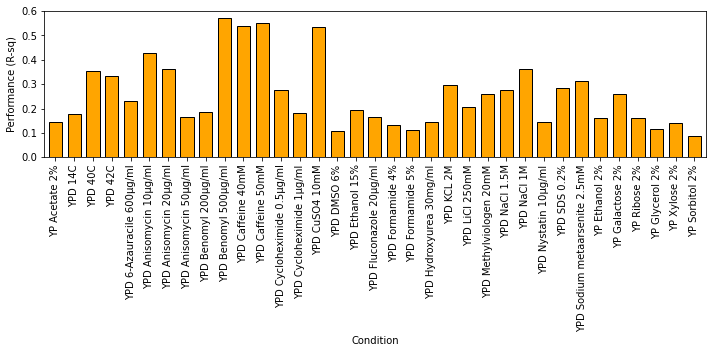

In [ ]:
results_cv.plot(kind="bar", color="orange", width=0.7, edgecolor="black", figsize=(10,5), ylabel="Performance (R-sq)", xlabel="Condition")
plt.tight_layout()
plt.savefig("%s/rrBLUP_average_CV_R2_v_Conditions_barplot.pdf"%dir)

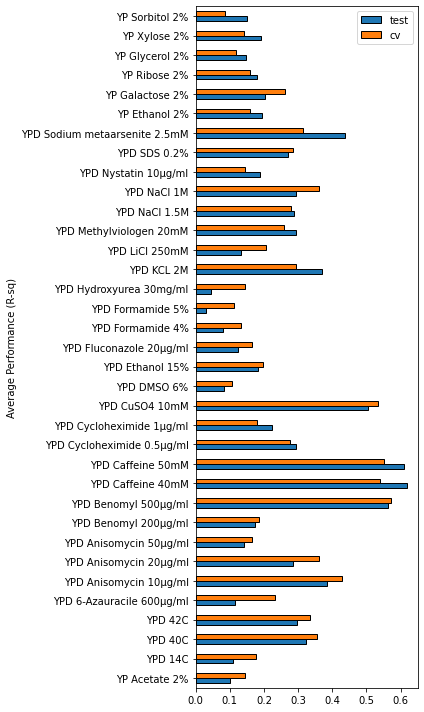

In [ ]:
results = pd.concat([results_test, results_cv], axis=1)
results.columns = ["test", "cv"]
results.plot(kind="barh", edgecolor="black", figsize=(6,10), xlabel="Average Performance (R-sq)", ylabel="Conditions")
plt.tight_layout()
plt.savefig("%s/rrBLUP_average_combined_R2_v_Conditions_barplot.pdf"%dir)

# ORF Copy Number-based rrBLUP

/mnt/home/seguraab/miniconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


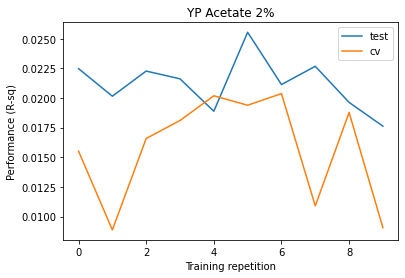

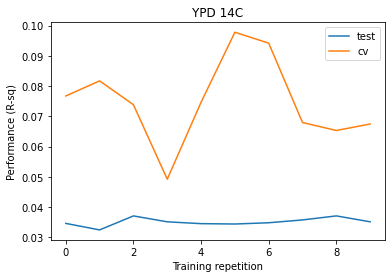

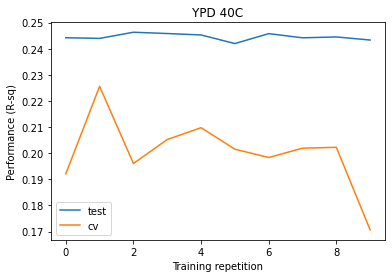

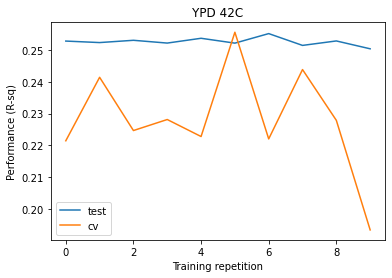

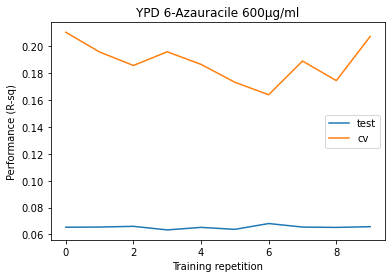

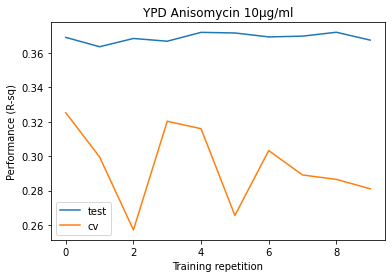

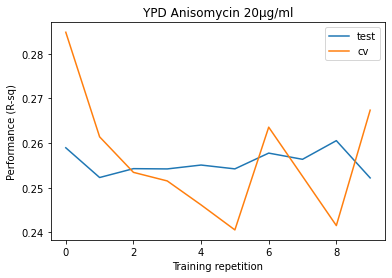

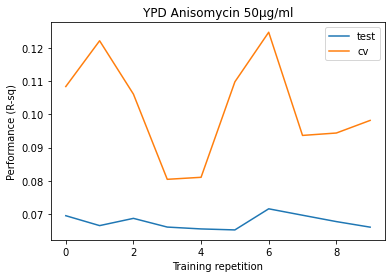

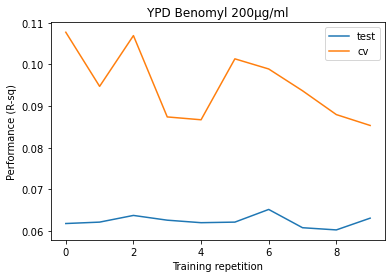

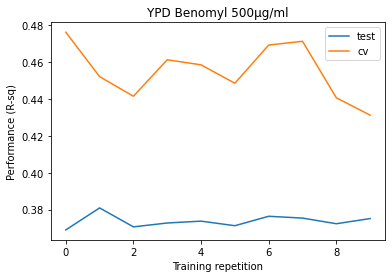

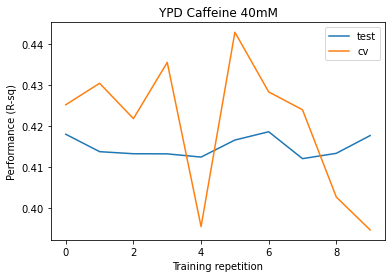

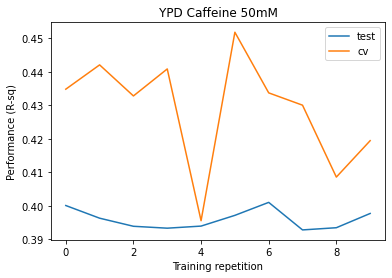

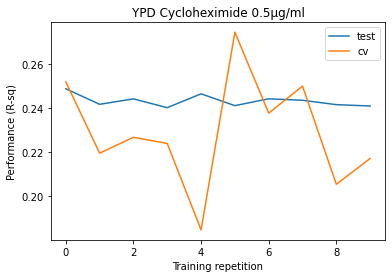

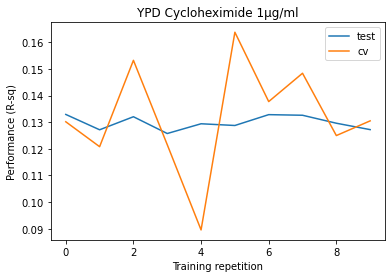

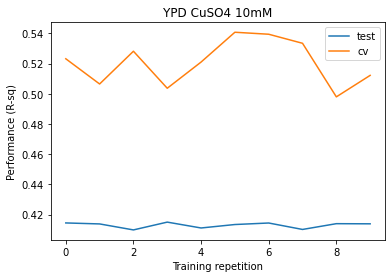

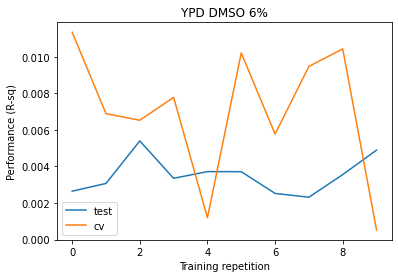

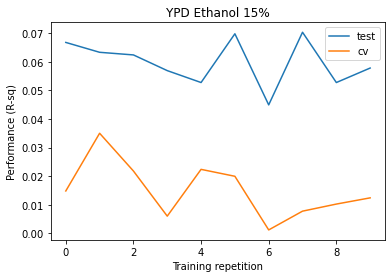

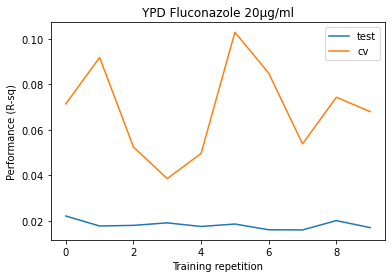

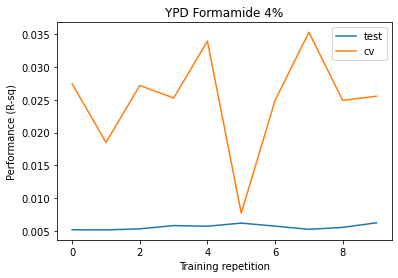

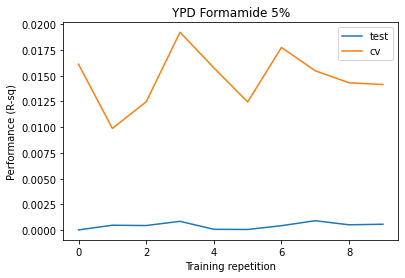

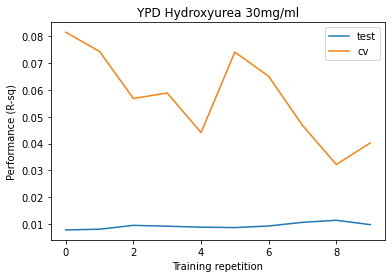

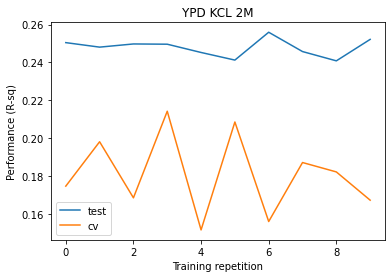

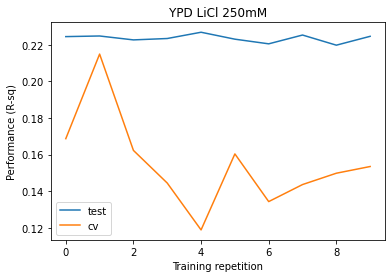

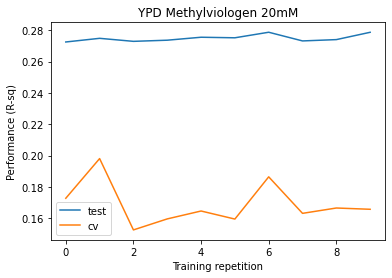

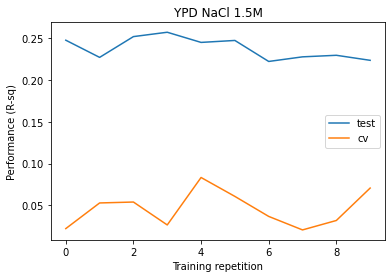

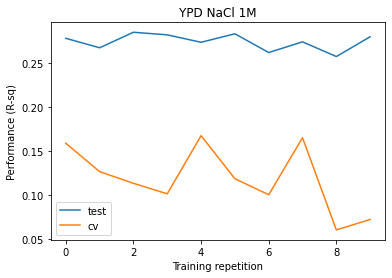

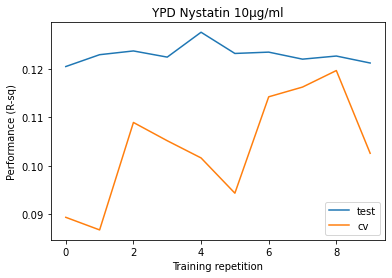

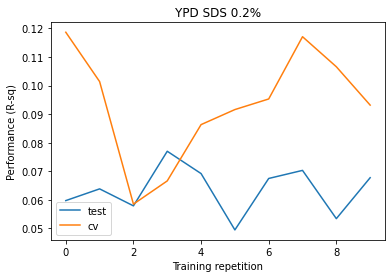

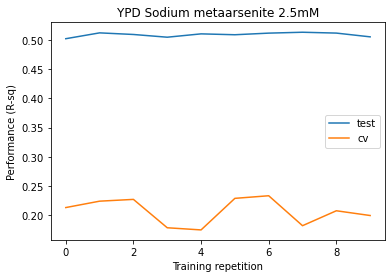

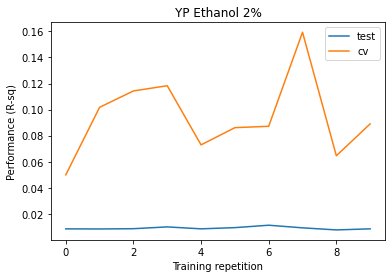

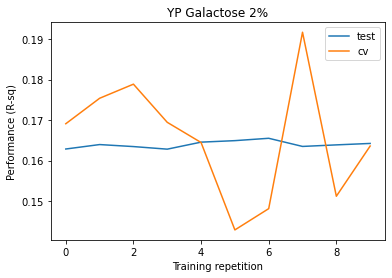

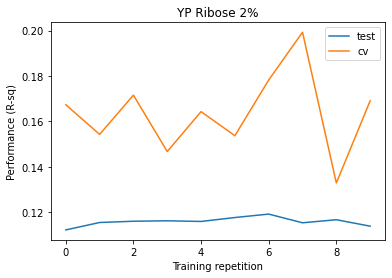

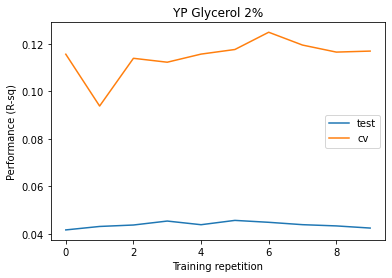

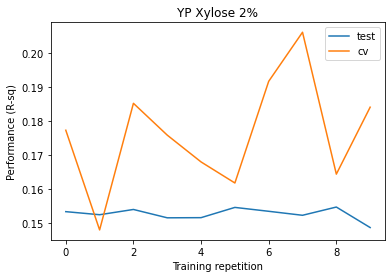

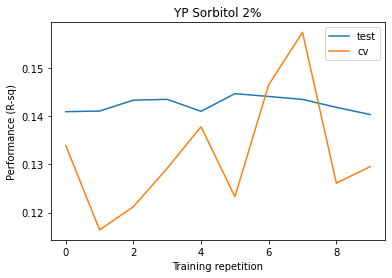

In [2]:
# Directory containing ORF-based rrBLUP results data
os.chdir("/mnt/gs18/scratch/users/seguraab/yeast_project/ORF_yeast_rrBLUP_results/")

results_test = {}
results_cv = {}
for env in envs:
    test = pd.read_csv("R2_test_results_ORFs_baseline_%s.csv"%env)
    cv = pd.read_csv("R2_cv_results_ORFs_baseline_%s.csv"%env)
    # average results for all envs
    results_test[cond[env]] = test.mean()[0]
    results_cv[cond[env]] = cv.mean()[0]
    # plot performance on test set and validation set
    ax = test.plot(xlabel="Training repetition", ylabel="Performance (R-sq)")#, title=cond[env].values)
    cv.plot(ax=ax)
    plt.legend(["test", "cv"])
    plt.title(cond[env])
    plt.savefig("%s/rrBLUP_ORF_R2_cv_and_test_%s.pdf"%(dir,env))

# Average performance of each context-specific model
results_test = pd.Series(data = results_test)
results_cv = pd.Series(data = results_cv)

# save to file
dir2 = "/mnt/home/seguraab/Shiu_Lab/Project/Results"
results_test.to_csv("%s/rrBLUP_CNO_average_test_R2.csv"%dir2)
results_cv.to_csv("%s/rrBLUP_CNO_average_cv_R2.csv"%dir2)

# ORF pres/abs-based rrBLUP

In [ ]:
# Directory containing ORF-based rrBLUP results data
os.chdir("/mnt/gs18/scratch/users/seguraab/yeast_project/ORF_yeast_rrBLUP_results/")

results_test = {}
results_cv = {}
for env in envs:
    test = pd.read_csv("R2_test_results_ORFs_pres_abs_baseline_%s.csv"%env)
    cv = pd.read_csv("R2_cv_results_ORFs_pres_abs_baseline_%s.csv"%env)
    # average results for all envs
    results_test[cond[env]] = test.mean()[0]
    results_cv[cond[env]] = cv.mean()[0]
    # plot performance on test set and validation set
    ax = test.plot(xlabel="Training repetition", ylabel="Performance (R-sq)")#, title=cond[env].values)
    cv.plot(ax=ax)
    plt.legend(["test", "cv"])
    plt.title(cond[env])
    plt.savefig("%s/rrBLUP_ORF_pres_abs_R2_cv_and_test_%s.pdf"%(dir,env))

# Average performance of each context-specific model
results_test = pd.Series(data = results_test)
results_cv = pd.Series(data = results_cv)

# save to file
dir2 = "/mnt/home/seguraab/Shiu_Lab/Project/Results"
results_test.to_csv("%s/rrBLUP_ORF_pres_abs_average_test_R2.csv"%dir2)
results_cv.to_csv("%s/rrBLUP_ORF_pres_abs_average_cv_R2.csv"%dir2)

## Compare SNP-based and ORF-based rrBLUP models

In [ ]:
os.chdir("/mnt/home/seguraab/Shiu_Lab/Project/Results")
orf_test = pd.read_csv("rrBLUP_ORF_pres_abs_average_test_R2.csv")
orf_cv = pd.read_csv("rrBLUP_ORF_pres_abs_average_cv_R2.csv")
cno_test = pd.read_csv("rrBLUP_CNO_average_test_R2.csv")
cno_cv = pd.read_csv("rrBLUP_CNO_average_cv_R2.csv")
snp_test = pd.read_csv("rrBLUP_average_test_R2.csv")
snp_cv = pd.read_csv("rrBLUP_average_cv_R2.csv")

cv = pd.merge(snp_cv, orf_cv, on="Unnamed: 0")
cv = pd.merge(cv, cno_cv, on="Unnamed: 0")
cv.columns = ["Condition", "SNP-based R-sq", "ORF pres/abs R-sq", "ORF copy num R-sq"]
test = pd.merge(snp_test, orf_test, on="Unnamed: 0")
test = pd.merge(test, cno_test, on="Unnamed: 0")
test.columns = ["Condition", "SNP-based R-sq", "ORF pres/abs R-sq", "ORF copy num R-sq"]
test.head()

: 

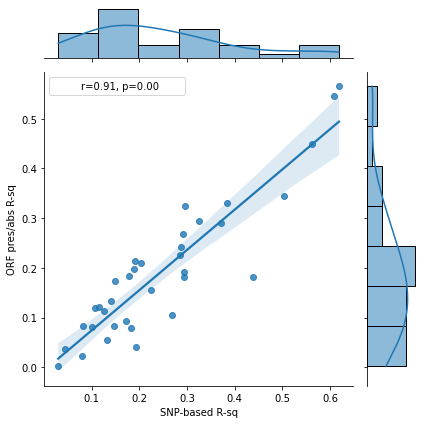

In [44]:
import seaborn as sns
from scipy import stats
r, p = stats.pearsonr(x=test["SNP-based R-sq"], y=test["ORF pres/abs R-sq"])
r-sq = r.pow(2)
#fig, ax = plt.subplots(1, 1, figsize=(7, 7))
f=sns.jointplot(x=test["SNP-based R-sq"], y=test["ORF pres/abs R-sq"], kind="reg")#ax=ax, fit_reg=True, , label="scatter")
phantom, = f.ax_joint.plot([], [], linestyle="", alpha=0)
f.ax_joint.legend([phantom],['R-sq={:.2f}, r={:.2f}, p={:.2f}       '.format(r-sq,r,p)])
plt.tight_layout()
f.savefig("rrBLUP_CNO_vs_SNP_test_R2_linear.pdf")

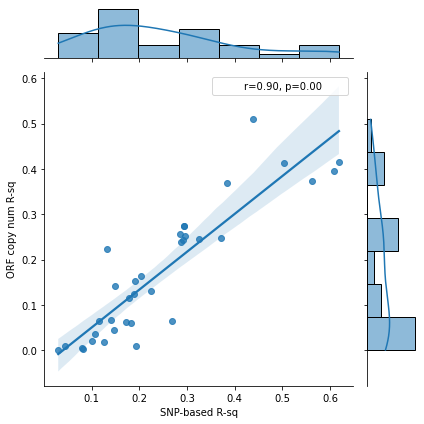

In [45]:
r, p = stats.pearsonr(x=test["SNP-based R-sq"], y=test["ORF copy num R-sq"])
r-sq = r.pow(2)
f=sns.jointplot(x=test["SNP-based R-sq"], y=test["ORF copy num R-sq"], kind="reg")
phantom, = f.ax_joint.plot([], [], linestyle="", alpha=0)
f.ax_joint.legend([phantom],['R-sq={:.2f}, r={:.2f}, p={:.2f}       '.format(r-sq,r,p)])
plt.tight_layout()
f.savefig("rrBLUP_ORF_vs_SNP_test_R2_linear.pdf")

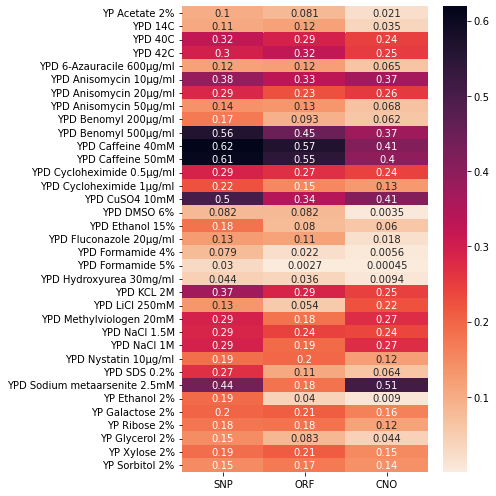

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
sns.heatmap(ax = ax, data=test.iloc[:,1:4], annot=True, cmap="rocket_r", yticklabels=test["Condition"])
plt.xticks(ticks=(0.5,1.5,2.5), labels=["SNP", "ORF", "CNO"])
plt.tight_layout()
plt.savefig("rrBLUP_ORF_vs_SNP_test_R2_heatmap.pdf")